# Artificial Neural Network (ANN's)

---
---

# Section 1 - Artificial Neural Networks Theory and Personal Notes

## Introduction

A Neural Network becomes a *Deep Neural Network* if it contains 2 or more hidden layers, without considering the the *Input Layer* (first) and the *Output Layer* (last).

- *Input Layer*: The first layer that directly accepts real data values as inputs to the model.
- *Hidden Layers*: Are the 2 or more layers connected that are in between the input and output layers.
- *Output Layer*: The final layer that estimates the output of the neural network model.

> **NOTE**:
It's proved mathematically that **Neural Networks** can be used to **approximate any convex continuos function** known as the Universal Approximation Theorem.


## Activation Functions


- **Step Function** 
    - Simple step function that returns the values 0 or 1 regardless of the input value, very useful for classification (0 or 1 class).
    - Output: 0 and 1.
    - Is a very “strong” function, since small changes aren’t reflected.
    - It is not recommended to use it in hidden layers because it does not represent derivative learning value and it will not appear in the future.
    - It's an inmediate cut off from 0 to 1.
    
    
- **Sigmoid Function**
    - Simple function similar to the step function that returns the values 0 or 1 regardless of the input value but have a more dynamic function, very useful for classification (0 or 1 class).
    - Output: 0 and 1.
    - Is a “sensitive” function, since small changes are reflected.
    - The vanishing gradient and the learning is minimal. if 0, not any learning! When slow learning occurs, the optimization algorithm that minimizes error can be attached to local minimum values and cannot get maximum performance from the artificial neural network model.
    
    
- **Hyperbolic Tangent Function**
    - Simple function similar to the step function that returns the values 0 or 1 regardless of the input value but have a more dynamic function, very useful for classification (0 or 1 class).
    - Output: Between -1 and 1.
    - Is a “sensitive” function, since small changes are reflected.   
    - Similar to Sigmoid function, the advantage is that its derivative is more steep, this means that it will be more efficient because it has a wider range for faster learning and grading. But again, the problem of gradients at the ends of the function continues.
    
    
    
- **Rectified Linear Unit (ReLU) Function**
    - The fact that the calculation load is less than the sigmoid and hyperbolic tangent functions has led to a higher preference for multi-layer networks.
    - ReLu has been found to have very good performance, especially when dealing with the issue of vanishing gradient.
    - Often default to ReLu due to its overall good performance.



- **Softmax Function**
    - Similar to Sigmoid function, it performs fairly well when used as a classifier. 
    - The most important difference is that it is preferred in the output layer of deep learning models, especially when it is necessary to classify more than two. 
    - It allows determining the probability that the input belongs to a particular class by producing values in the range 0-1.
   
    
    
## Multi-Class Activation Functions

There are 2 main types of multi-class situations:

1. **Non-Exclusive Classes [Activation Function: Sigmoid]** 
    - A data point can have multiple classes/categories assigned to it.
2. **Mutually Exclusive Classes [Activation Function: Softmax]**
    - A data point can only have one class/category assigned to it.
       
       
       
- **Organizing Multiple Classes**: 
    - Instead of having multiple classes in one column (such as red, blue, green for example) we use **One-Hot Encoding**.
    - In the case of *Non-Exclusive Class*, there are multiple 1's in the rows. 
    - In the case of *Mutually Exclusive Class*, for each one-hot encoded column, there can only be only 1 and the rest of the values must be 0's.
    
    
    
Now that we have our data correctly and properly organized, the next step is to **determine which is going to be the activation function for the Output layer** that we are going to use.

- **Case Non-Exclusive Class**
    - Activation Function: *Sigmoid Function*
    - Each neuron will output a value between 0 and 1, indicating the probability of having that class assigned to it.
    - Keep in mind this allows each neuron to output independent of the other classes, allowing for a single data point fed into the function to have multiple classes assigned to it.
    

- **Case Mutually Exclusive Class**
    - Activation Function: *Softmax Function*
    - Softmax function calculates the probabilities distribution of the event over *K* different events.
    - This function calculates the probabilities of each target class over all possible target classes.
    - The range will be 0 to 1, and **the sum of all the probabilities will be equal to one**.
    - The model returns the probabilities of each class and the target class chosen will have the highest probability.
    
    
    
## Which Activation Function Should you Preferred?

- The **Sigmoid** function can be used if you say that the **Hyperbolic Tangent** or model *can be learned a little slower* because of its wide range of activating functions. 
- The **ReLU** can be preferred if your *network is too deep and the computational load is a major problem*. You can decide to *use Leaky ReLU as a solution to the problem of vanishing gradients in ReLU*. But you do more computation than ReLU.
- The activation function is a critical optimization problem that you need to decide on the basis of all this information and the requirements of your deep learning model.


## Applying EarlyStopping in the Model

```python
# Import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping 

# Set earltstopping settings for classification (val_loss)
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# Fit the model using earlystopping
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test),
          verbose=1,
          callbacks=[early_stop])
```

---

# Project - ANN

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), the goal is to build a model that can predict wether or nor a borrower will pay back their loan. This way in the future when we get a new potential customer we can assess whether they are likely to pay back the loan or not.


## Data Overview
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: left;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Function to print the description of the variable

data_info = pd.read_csv("DATA/lending_club_info.csv",
                   index_col='LoanStatNew')

def feat_description(col_name):
    print(data_info.loc[col_name]['Description'])

In [3]:
feat_description("pub_rec_bankruptcies")

Number of public record bankruptcies


In [4]:
# Load the data 
df = pd.read_csv("DATA/lending_club_loan_two.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
df.describe(include='all').T.sort_values(by='max',
                                         ascending=False)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
annual_inc,396030,NaN,NaN,NaN,74203.2,61637.6,0,45000,64000,90000,8.70658e+06
revol_bal,396030,NaN,NaN,NaN,15844.5,20591.8,0,6025,11181,19620,1.74327e+06
loan_amnt,396030,NaN,NaN,NaN,14113.9,8357.44,500,8000,12000,20000,40000
dti,396030,NaN,NaN,NaN,17.3795,18.0191,0,11.28,16.91,22.98,9999
installment,396030,NaN,NaN,NaN,431.85,250.728,16.08,250.33,375.43,567.3,1533.81
revol_util,395754,NaN,NaN,NaN,53.7917,24.4522,0,35.8,54.8,72.9,892.3
total_acc,396030,NaN,NaN,NaN,25.4147,11.887,2,17,24,32,151
open_acc,396030,NaN,NaN,NaN,11.3112,5.13765,0,8,10,14,90
pub_rec,396030,NaN,NaN,NaN,0.178191,0.530671,0,0,0,0,86
mort_acc,358235,NaN,NaN,NaN,1.81399,2.14793,0,0,1,3,34


## Tasks

-----
-----

## Section 1: Exploratory Data Analysis (EDA)

**Get an understanding for which variables are important, view summary statistics, and visualize the data**

----

**TASK 1: Since we will be attempting to predict loan_status, create a countplot and a histogram as shown below and check how balanced or inbalanced the load_status column.**

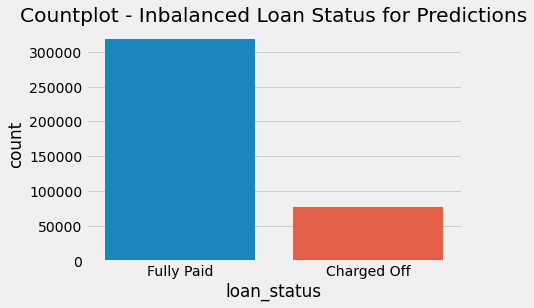

In [7]:
sns.countplot(df['loan_status'])
plt.title('Countplot - Inbalanced Loan Status for Predictions')
plt.show()

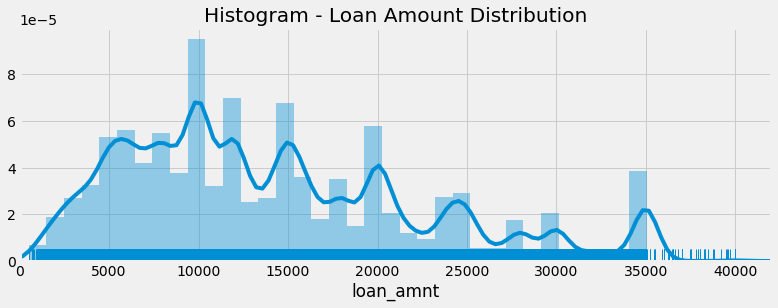

In [8]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'], kde=True, bins=40, rug=True)
plt.title('Histogram - Loan Amount Distribution')
plt.xlim(0, 42000)
plt.show()

**TASK: Explore the correlation coefficient between the continuous feature variables.**

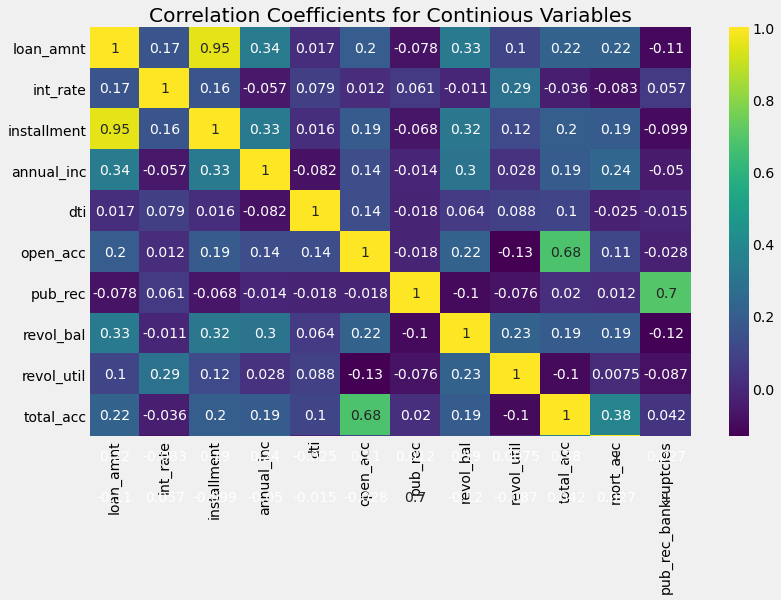

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title("Correlation Coefficients for Continious Variables")
plt.ylim(10, 0)
plt.show()

**TASK: Notice a 0.95 correlation between  `installment` and `loan_amnt`. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [10]:
print('Installment Description:')
feat_description('installment')

Installment Description:
The monthly payment owed by the borrower if the loan originates.


In [11]:
print('Loan Amount Description:')
feat_description('loan_amnt')

Loan Amount Description:
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


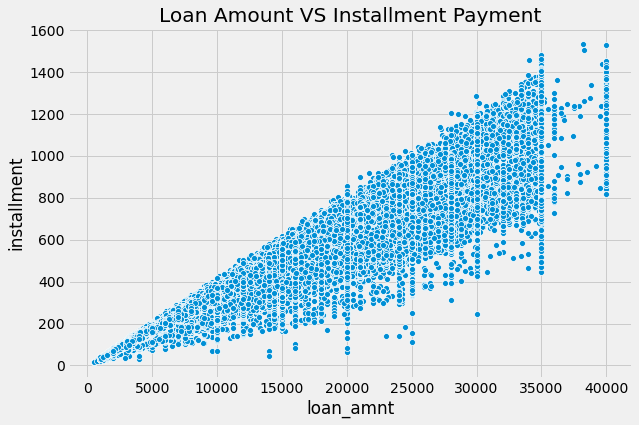

In [12]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='loan_amnt',y='installment',data=df)
plt.title("Loan Amount VS Installment Payment")
plt.show()

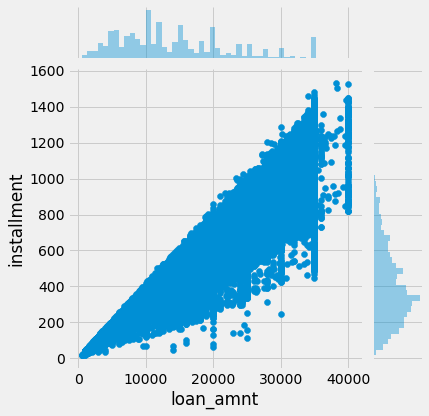

In [13]:
sns.jointplot(x='loan_amnt',y='installment',data=df)
plt.show()

**TASK: Create a boxplot showing the relationship between `loan_status` and the `Loan_amnt`.**

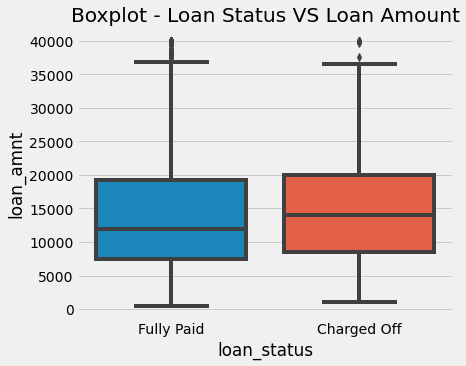

In [14]:
plt.figure(figsize=(6,5))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)
plt.title("Boxplot - Loan Status VS Loan Amount")
plt.show()

**TASK: Going in further, now we are going to calculate the summary statistics for the `loan_amnt`, grouped by the `loan_status`.**

In [15]:
print("\tSummary Statistics\nLoan Amount grouped by Loan Status\n")
df.groupby(by=['loan_status'])['loan_amnt'].describe().T

	Summary Statistics
Loan Amount grouped by Loan Status



loan_status,Charged Off,Fully Paid
count,77673.000000,318357.000000
mean,15126.300967,13866.878771
std,8505.090557,8302.319699
min,1000.000000,500.000000
25%,8525.000000,7500.000000
50%,14000.000000,12000.000000
75%,20000.000000,19225.000000
max,40000.000000,40000.000000


**TASK: Explore the Grade and SubGrade columns that LendingClub attributes to the loans, and create a countplot using the `loan_status` as plot hue.**

In [16]:
print("- Unique Values for Grade column:")
print(*sorted(df['grade'].unique()),'\n')
print("- Unique Values for Sub Grade column:")
print(*sorted(df['sub_grade'].unique()))

- Unique Values for Grade column:
A B C D E F G 

- Unique Values for Sub Grade column:
A1 A2 A3 A4 A5 B1 B2 B3 B4 B5 C1 C2 C3 C4 C5 D1 D2 D3 D4 D5 E1 E2 E3 E4 E5 F1 F2 F3 F4 F5 G1 G2 G3 G4 G5


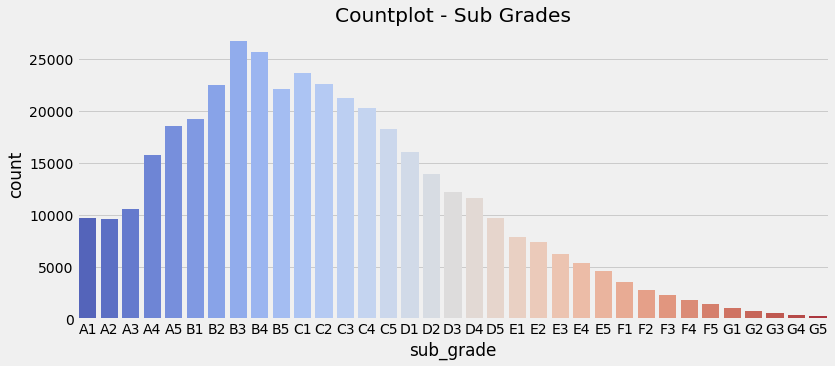

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',
              data=df,
              order=sorted(df['sub_grade'].unique()),
              palette='coolwarm')
plt.title("Countplot - Sub Grades")
plt.show()

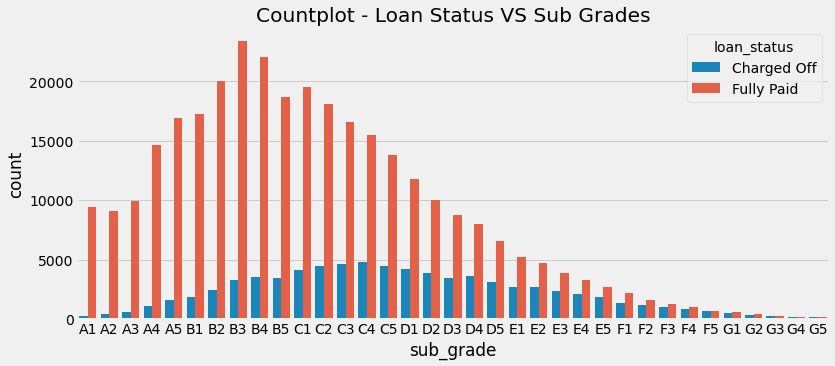

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',
              data=df,
              hue='loan_status',
              order=sorted(df['sub_grade'].unique()),
              hue_order=sorted(df['loan_status'].unique()))
plt.title("Countplot - Loan Status VS Sub Grades")
plt.show()

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

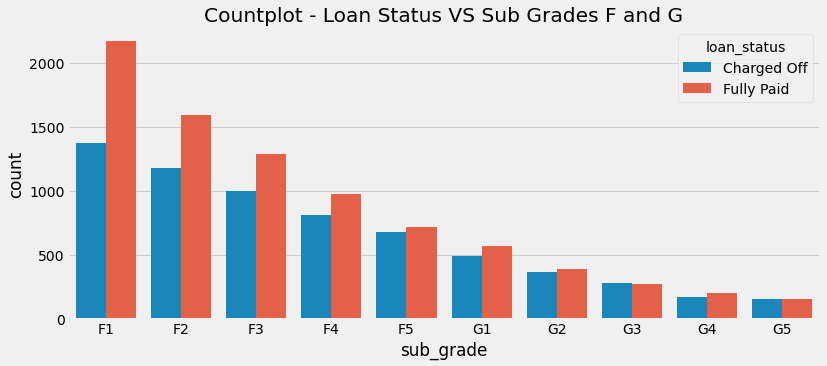

In [19]:
f_g_df = df[(df['grade'] == 'F') | (df['grade'] == 'G')]

plt.figure(figsize=(12,5))
sns.countplot(x='sub_grade',
              data=f_g_df,
              hue='loan_status',
              order=sorted(f_g_df['sub_grade'].unique()),
              hue_order=sorted(f_g_df['loan_status'].unique()))
plt.title("Countplot - Loan Status VS Sub Grades F and G")
plt.show()

**TASK: Create a new column with named `load_repaid` which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [20]:
df['loan_repaid'] = np.where(df['loan_status']=="Fully Paid", 1, 0)

In [21]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**TASK: Create a bar plot showing the correlation of the numeric features to the new `loan_repaid` column.**

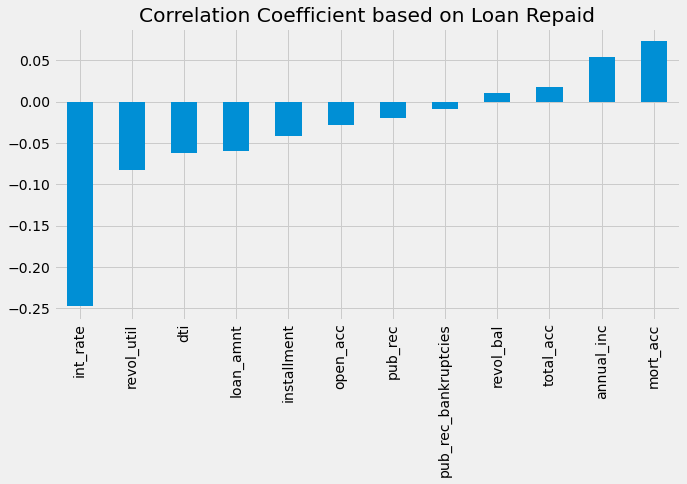

In [22]:
df.corr()['loan_repaid'].sort_values() \
    .drop('loan_repaid') \
    .plot(kind='bar',
          title="Correlation Coefficient based on Loan Repaid",
          figsize=(10,5));

---
---
# Section 2: Data PreProcessing

**Remove or fill any missing data. After that remove unnecessary or repetitive features. Convert categorical string features to dummy variables using.**

# Missing Data

**Let's start by exploring the missing data in the dataframe. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing values.**

In [23]:
print(f"Missing Values per Column in Percent\n\n{((df.isna().sum() / len(df)) * 100)}")

Missing Values per Column in Percent

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64


**TASK: Let's examine `emp_title` (5.78% NaN's) and `emp_length` (4.62% NaN's) to see whether it will be okay to drop them.**

In [24]:
print("- Employment Title Description:")
feat_description('emp_title')
print()
print("- Employment Length Description:")
feat_description('emp_length')

- Employment Title Description:
The job title supplied by the Borrower when applying for the loan.*

- Employment Length Description:
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [25]:
print(f"- Total Number of Unique Job Titles: {df['emp_title'].nunique()}\n")
print("- Unique Job Titles and Percent of each one in the Data:")
df['emp_title'].value_counts(normalize=True) * 100

- Total Number of Unique Job Titles: 173105

- Unique Job Titles and Percent of each one in the Data:


Teacher                               1.176351
Manager                               1.139096
Registered Nurse                      0.497450
RN                                    0.494770
Supervisor                            0.490481
                                        ...   
Joseph T. Mullen, Jr. & Associates    0.000268
Appraisal Support                     0.000268
export manager                        0.000268
Dart Neuroscience, LLC                0.000268
LIUNA Training and Education Fund     0.000268
Name: emp_title, Length: 173105, dtype: float64

**TASK: If we are realistic, there are too many unique job titles to convert the column `emp_title` into a dummy variable feature, so let's drop it from the dataframe.**

In [26]:
# ONLY RUN THIS CELL 1 TIME!
df = df.drop(['emp_title'], axis=1)

**TASK: Create a countplot of the `emp_length` feature column, and the same plot but now adding the `loan_status` as the plot hue.**

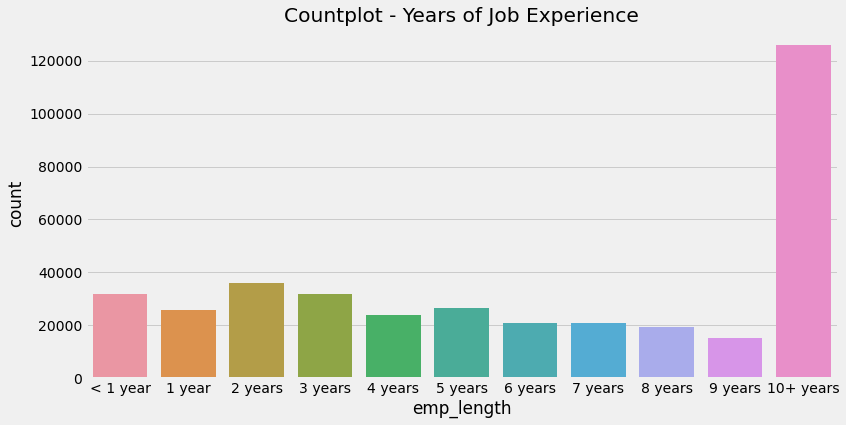

In [27]:
plt.figure(figsize=(12,6))

emp_length_order = ['< 1 year', '1 year', '2 years', '3 years',
                    '4 years', '5 years', '6 years', '7 years',
                    '8 years', '9 years', '10+ years']

sns.countplot(x='emp_length', data=df, order=emp_length_order)
plt.title("Countplot - Years of Job Experience")
plt.show()

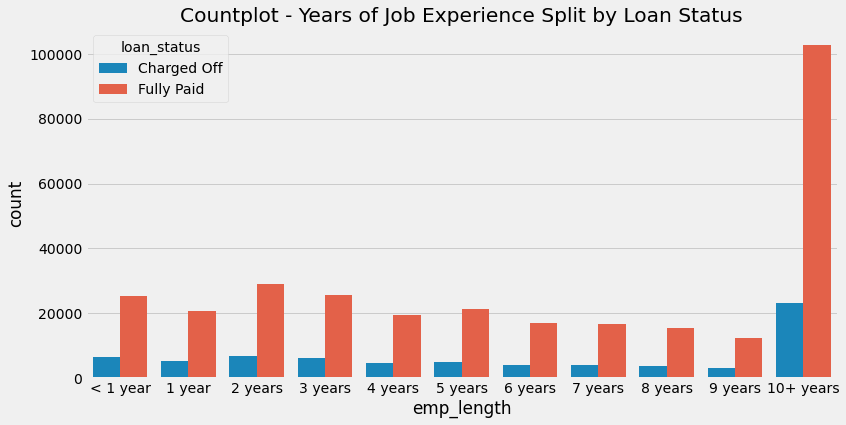

In [28]:
plt.figure(figsize=(12,6))

emp_length_order = ['< 1 year', '1 year', '2 years', '3 years',
                    '4 years', '5 years', '6 years', '7 years',
                    '8 years', '9 years', '10+ years']

sns.countplot(x='emp_length', data=df, order=emp_length_order,
              hue='loan_status', hue_order=['Charged Off', 'Fully Paid'])
plt.title("Countplot - Years of Job Experience Split by Loan Status")
plt.show()

**TASK: What is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. Finally, visualize it with a Bar plot**

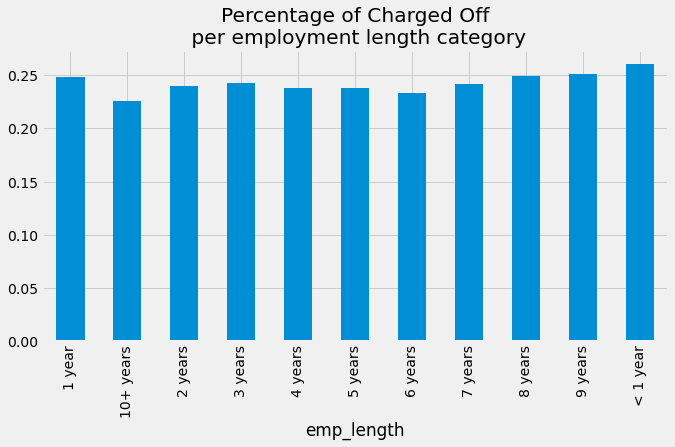

In [29]:
# Percentage of charged off
emp_charged = df[df['loan_status']=="Charged Off"] \
            .groupby("emp_length") \
            .count()['loan_status']

# Percentage of fully paid
emp_fully = df[df['loan_status']=="Fully Paid"] \
            .groupby("emp_length") \
            .count()['loan_status']

# Estimate percentage charged off over fully paid
emp_charged_over_fully = emp_charged / emp_fully

# Plot
emp_charged_over_fully \
    .plot(kind='bar',
          title="Percentage of Charged Off\n per employment length category",
          figsize=(10,5))
plt.show()

**TASK: Charged off rates are extremely similar across all employment lengths, so drop the `emp_length` column.**

In [30]:
# ONLY RUN THIS CELL 1 TIME!
df = df.drop(['emp_length'], axis=1)

In [31]:
df.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [32]:
print("- Purpose Description:")
feat_description('purpose')
print()
print("- Title Description:")
feat_description('title')
print()

df[['title', 'purpose']].head(10)

- Purpose Description:
A category provided by the borrower for the loan request. 

- Title Description:
The loan title provided by the borrower



,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


**TASK: The `title` column is simply a string subcategory/description of the `purpose` column. Drop the `title` column.**

In [33]:
# ONLY RUN THIS CELL 1 TIME!
df = df.drop(['title'], axis=1)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents and print the value counts**

In [34]:
print("- Mortgage Accounts Description:")
feat_description('mort_acc')
print()

df['mort_acc'].value_counts(normalize=True)

- Mortgage Accounts Description:
Number of mortgage accounts.



0.0     0.390182
1.0     0.168649
2.0     0.139428
3.0     0.106212
4.0     0.077846
5.0     0.050788
6.0     0.030899
7.0     0.016894
8.0     0.008712
9.0     0.004623
10.0    0.002415
11.0    0.001337
12.0    0.000737
13.0    0.000408
14.0    0.000299
15.0    0.000170
16.0    0.000103
17.0    0.000061
18.0    0.000050
19.0    0.000042
20.0    0.000036
24.0    0.000028
22.0    0.000020
21.0    0.000011
25.0    0.000011
27.0    0.000008
23.0    0.000006
32.0    0.000006
26.0    0.000006
31.0    0.000006
30.0    0.000003
28.0    0.000003
34.0    0.000003
Name: mort_acc, dtype: float64

**TASK:**
There are many ways we could deal with this missing data:
- We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns.
- Or you could even bin the columns into categories and then set NaN as its own category.


There is no 100% correct approach! **Let's review the other columns to see which most highly correlates to `mort_acc` column.**

In [35]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].drop('mort_acc') \
                     .sort_values(ascending=False)

Correlation with the mort_acc column


total_acc               0.381072
annual_inc              0.236320
loan_amnt               0.222315
revol_bal               0.194925
installment             0.193694
open_acc                0.109205
loan_repaid             0.073111
pub_rec_bankruptcies    0.027239
pub_rec                 0.011552
revol_util              0.007514
dti                    -0.025439
int_rate               -0.082583
Name: mort_acc, dtype: float64

**TASK: The `total_acc` feature correlates with the `mort_acc`(0.38), this makes sense! We will group the dataframe by the `total_acc` and calculate the mean value for the `mort_acc`. The next step is to create a function to replace the NaN values using the `total_acc` mean value just calculated for each mortage account category**

In [36]:
# Dictionary that holds the averages per mort_acc category
total_acc_avg_dict = df.groupby(by=['total_acc']).mean()['mort_acc'].to_dict()

# Fill nan values function
def fill_mort_acc_nan(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg_dict[total_acc]
    else:
        return mort_acc

In [37]:
# Fill the nan values from the mort_acc col
df['mort_acc'] = df.apply(lambda x: fill_mort_acc_nan(x['total_acc'], x['mort_acc']),
                          axis=1)

In [38]:
df.isna().sum() / len(df) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**TASK: the columns `revol_util` and `pub_rec_bankruptcies` have nan values, but they account for less than 0.5% of the total data. So, let's drop the rows that have missing values.**

In [39]:
# ONLY RUN THIS CELL 1 TIME!
df = df.dropna()

In [40]:
print(f"Total NaN Values in Dataframe after dropna() = {df.isna().sum().sum()}")

Total NaN Values in Dataframe after dropna() = 0


## Categorical Variables and Dummy Variables

**We're done working with the NaN values! The next step is to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric.**

In [41]:
df.select_dtypes(['object']).columns.to_list()

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

---
**Let's go through ALL the string/object features to determine what to do with them.**

---


### Feature: `term`

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type.**

In [42]:
df['term'] = df['term'].apply(lambda x: x.strip().split(" ")[0])

### Feature: `grade`

**TASK: We know `grade` is part of `sub_grade`, so let's drop this feature.**

In [43]:
# ONLY RUN THIS CELL 1 TIME!
df = df.drop(['grade'], axis=1)

### Feature: `sub_grade`

**TASK: Convert the subgrade into dummy variables. Drop the original `sub_grade` column and to use `get_dummies(drop_first=True)`.**

In [44]:
# Transform sub_grade using ohe
subgrades_dummies = pd.get_dummies(data=df['sub_grade'], 
                                   drop_first=True)

# Concatenate the original dataframe with the dummy variables
df = pd.concat([df.drop('sub_grade', axis=1), subgrades_dummies],
               axis=1)

In [45]:
df.select_dtypes(['object']).columns

Index(['term', 'home_ownership', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### Features: `verification_status`, `application_type`, `initial_list_status`, `purpose` 
**TASK: Convert these columns into dummy variables and concatenate them with the original dataframe.**

In [46]:
# List the columns to transform
ohe_cols = ['verification_status', 'application_type',
            'initial_list_status', 'purpose']

# Transform columns using ohe
dummy_variables = pd.get_dummies(data=df[ohe_cols],
                                 drop_first=True)

# Concatenate the original dataframe with the dummy variables
df = pd.concat([df.drop(ohe_cols, axis=1), dummy_variables],
               axis=1)

### Feature: `home_ownership`

**TASK: Convert these to dummy variables, but replace NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe.**

In [47]:
# Merge the categories none and any into other 
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

# Transform home_ownership using ohe
dummy_variable = pd.get_dummies(data=df['home_ownership'],
                                 drop_first=True)

# Concatenate the original dataframe with the dummy variables
df = pd.concat([df.drop('home_ownership', axis=1), dummy_variable],
               axis=1)

### Feature: `address`

**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called `zip_code` that extracts the zip code from the address column.**

Note: The zip code is in the last part of the addresses.

**TASK: After looking into the `value_counts()`, there are few zip codes, so transform them into dummy variables and drop the original column.**

In [48]:
# Extract the zip code from the address
df['zip_code'] = df['address'].apply(lambda x: x.split(" ")[-1])

# Examine the value_counts() of the zip_code col
df['zip_code'].value_counts()

# Transform zip code using ohe
dummy_variable = pd.get_dummies(data=df['zip_code'],
                                prefix='zip_code',
                                drop_first=True)

# Concatenate the original dataframe with the dummy variables
df = pd.concat([df.drop(['zip_code', 'address'], axis=1), dummy_variable],
                axis=1)

### Feature: `issue_d` 

**TASK: This would be DATA LEAKAGE because we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, so drop this feature.**

In [49]:
# ONLY RUN 1 TIME!
df = df.drop('issue_d', axis=1)

### Feature: `earliest_cr_line`

**TASK: This appears to be a historical timestamp feature. Extract the year from this feature and then convert it to a numeric feature. Set this new data to a feature column called `earliest_cr_year`. Finally, drop the `earliest_cr_line` column.**

In [50]:
# Extract the year and transform into int
df['earliest_cr_year'] = df['earliest_cr_line'] \
                                .apply(lambda x: int(x.split('-')[-1]))

# Drop column
df = df.drop('earliest_cr_line', axis=1)

# Section 3: Train Test Split & Normalization

**TASK: Drop the `load_status` column since it's a duplicate of the `loan_repaid` column because it's already in 0s and 1s.**

In [52]:
# ONLY RUN 1 TIME!
df = df.drop('loan_status', axis=1)

## Train-Test Split

**TASK: Split the data with `train_test_split()`.**

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# Split the data in dependent and independent variables
X = df.drop('loan_repaid', axis=1).values
y = df['loan_repaid'].values

# Split the data in train and test split using 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**TASK: Use `MinMaxScaler()` to normalize the feature data X_train and X_test.**

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:
# Set the scaler
scaler = MinMaxScaler()

# Fit and transform the train data X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data X_test 
X_test_scaled = scaler.transform(X_test)

# Section 4: Creating the ANN Model

In [61]:
import tensorflow as tf
from tensorflow.keras.models import Sequential  # import sequential model
from tensorflow.keras.layers import Dense  # import dense layer
from tensorflow.keras.layers import Activation  # import activation function
from tensorflow.keras.layers import Dropout  # import dropouyt (turn-off neurons randomly)
from tensorflow.keras.constraints import max_norm

**TASK: Build a sequential model to will be trained on the data. Build a model that goes 78 --> 39 --> 19--> 1 output neuron. Explore adding Dropout Layers that turn-off a percentage of neurons in the layer at random.**

In [68]:
# Build sequential model
model = Sequential()

# Input layer
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

# Hidden Layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# Hidden Layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam')

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Add in a batch_size of 256.**

In [69]:
# Fit the model
model.fit(x=X_train_scaled,
         y=y_train,
         epochs=25,
         verbose=1,
         batch_size=256,
         validation_data=(X_test_scaled, y_test))

Epoch 1/25
9881/9881 [==============================] - 19s 2ms/step - loss: 0.2746 - val_loss: 0.2678
Epoch 2/25
9881/9881 [==============================] - 16s 2ms/step - loss: 0.2632 - val_loss: 0.2625
Epoch 3/25
9881/9881 [==============================] - 15s 2ms/step - loss: 0.2622 - val_loss: 0.2623
Epoch 4/25
9881/9881 [==============================] - 16s 2ms/step - loss: 0.2616 - val_loss: 0.2628
Epoch 5/25
9881/9881 [==============================] - 16s 2ms/step - loss: 0.2612 - val_loss: 0.2625
Epoch 6/25
9881/9881 [==============================] - 16s 2ms/step - loss: 0.2607 - val_loss: 0.2629
Epoch 7/25
9881/9881 [==============================] - 16s 2ms/step - loss: 0.2605 - val_loss: 0.2618
Epoch 8/25
9881/9881 [==============================] - 16s 2ms/step - loss: 0.2603 - val_loss: 0.2626
Epoch 9/25
9881/9881 [==============================] - 16s 2ms/step - loss: 0.2601 - val_loss: 0.2637
Epoch 10/25
9881/9881 [==============================] - 16s 2ms/step - l

# Section 5: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

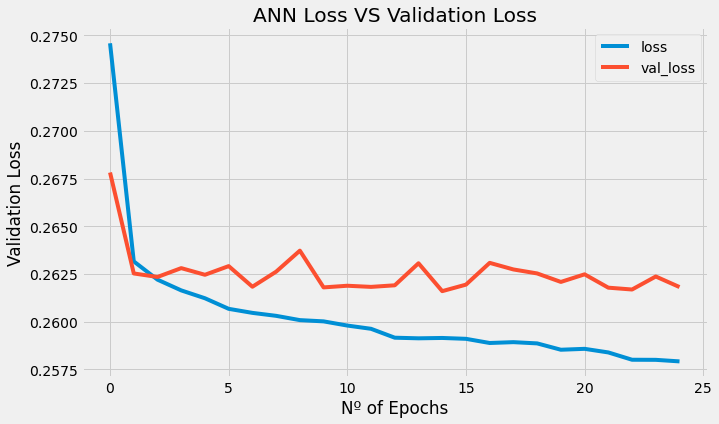

In [70]:
# Save the losses in a dataframe
losses = pd.DataFrame(model.history.history)

# Plot the losses
losses[['loss','val_loss']].plot(title="ANN Loss VS Validation Loss",
                                 figsize=(10,6))
plt.xlabel('Nº of Epochs')
plt.ylabel("Validation Loss")
plt.show()

In [71]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [72]:
# Make predictions on the test data
predictions = model.predict_classes(X_test_scaled)

# Print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.93      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



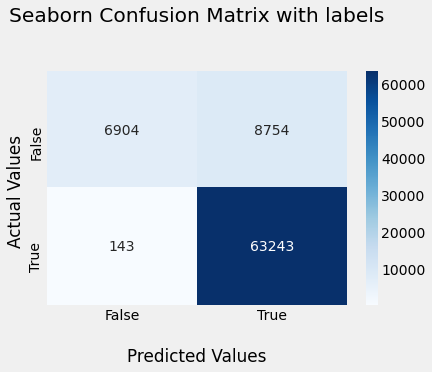

In [78]:
# Plot confusion matrix
ax = sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Blues', fmt='#')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

# Set ticks labels (List must be in alphabetical order)
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# Section 6: Save The Model

**TASK: Save the model using tensorflow (.h5) format**

In [79]:
# Using .5 tensorflow saving format
model.save('saved_model/full_ann_project_model.h5')

In [82]:
# load the model
from tensorflow.keras.models import load_model

model = load_model('saved_model/full_ann_project_model.h5')
model.predict(X_test_scaled)